In [44]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

1. Loading dataset from a custom folder
2. Data Augmentation (Transforming images to augment existing dataset)

In [42]:
img_width, img_height = 224, 224

train_data_dir = r'C:\Users\phani\OneDrive\Trainings\CNN-Dataset\v_data\train'
validation_data_dir = r'C:\Users\phani\OneDrive\Trainings\CNN-Dataset\v_data\test'

nb_train_samples = 400 # 200 Cars , 200 Planes
nb_validation_samples = 100 # 50 Cars , 50 Planes

### Data Preparation

In [55]:
train_datagen = ImageDataGenerator(
    rescale= 1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1/255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [66]:
train_output = train_generator.next()

In [67]:
images = train_output[0]
labels = train_output[1]

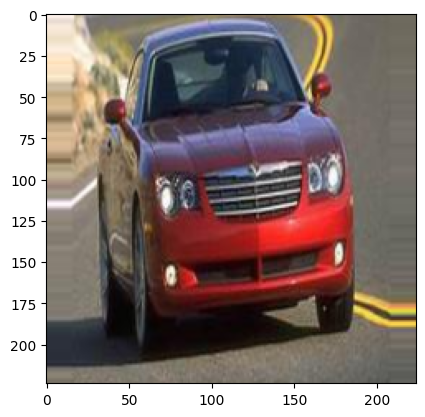

In [68]:
plt.imshow(images[1])
plt.show()

In [65]:
labels

array([1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
      dtype=float32)

## Model Building

In [69]:
model = Sequential()
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
epochs = 10
batch_size = 16

model.fit(
    train_generator,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps= nb_validation_samples // batch_size)

Epoch 1/10
25/25 [==============================] - 9s 365ms/step - loss: 3.3944 - accuracy: 0.5925 - val_loss: 0.5271 - val_accuracy: 0.6875
Epoch 2/10
25/25 [==============================] - 11s 447ms/step - loss: 0.4303 - accuracy: 0.7850 - val_loss: 0.4262 - val_accuracy: 0.8021
Epoch 3/10
25/25 [==============================] - 13s 504ms/step - loss: 0.2947 - accuracy: 0.8950 - val_loss: 0.2583 - val_accuracy: 0.8854
Epoch 4/10
25/25 [==============================] - 12s 484ms/step - loss: 0.2456 - accuracy: 0.8950 - val_loss: 0.2519 - val_accuracy: 0.8750
Epoch 5/10
25/25 [==============================] - 11s 445ms/step - loss: 0.2512 - accuracy: 0.9150 - val_loss: 0.2814 - val_accuracy: 0.8958
Epoch 6/10
25/25 [==============================] - 10s 392ms/step - loss: 0.2460 - accuracy: 0.9025 - val_loss: 0.5372 - val_accuracy: 0.7812
Epoch 7/10
25/25 [==============================] - 10s 403ms/step - loss: 0.2356 - accuracy: 0.8975 - val_loss: 0.2164 - val_accuracy: 0.9167


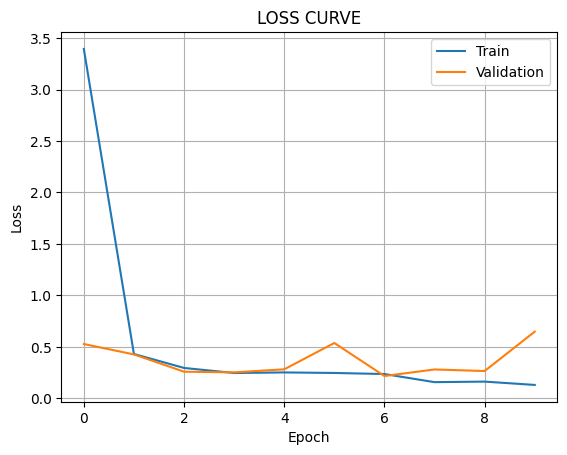

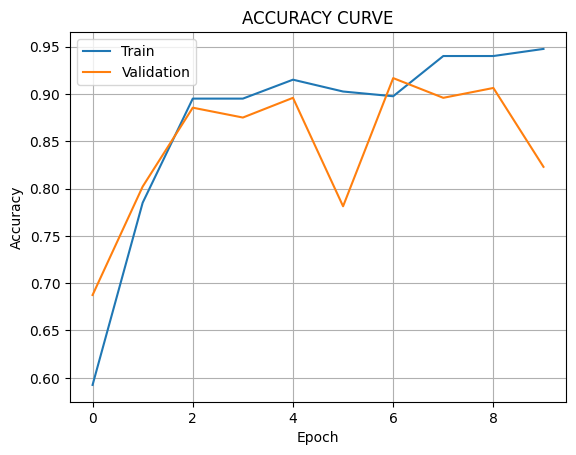

In [31]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

### Generating predictions

In [36]:
test = validation_generator.next()[0]

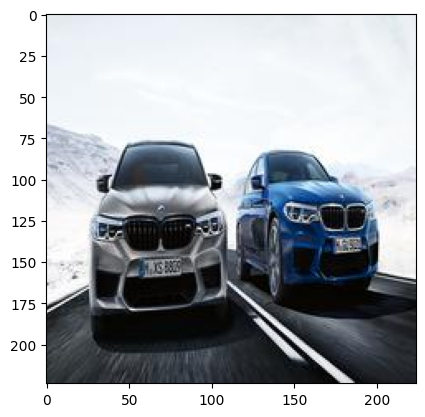

In [38]:
plt.imshow(test[0])
plt.show()

In [41]:
model.predict(test)[0]

array([0.00112274], dtype=float32)